

#Grosarycart Market Basket Analysis



The objective is to predict which customer will repurchase a product in his current order, based on a anonymized dataset containing 3,000,000 orders.

Each user then has about 4 - 100 orders.

A user's reorder depends on User, the products that he purchases and the history of his purchases

#Extraction and Loading
Lets take look at a few datasets provided

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/data science/MarketBasketAnalysisRetailDatausingPython.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/data science/orders.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
aisles=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/aisles.csv')
departments=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/departments.csv')
orders=pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/products.csv')
prior=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_prior.csv')
train=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_train.csv')
test=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_test.csv')

In [ ]:
print("aisles ",aisles.shape)
print("Deaprtment ",departments.shape)
print("Orders ",orders.shape)
print("Products ",products.shape)
print("Prior ",prior.shape)
print("train ",train.shape)
print("test ",test.shape)

aisles  (134, 2)
Deaprtment  (21, 2)
Orders  (3421083, 7)
Products  (49688, 4)
Prior  (32434489, 4)
train  (1068168, 5)
test  (316449, 5)


#Data Exploration and Data Wrangling
Explore Products data frame

In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
(rows, cols ) = products.shape
print("There are {} procucts".format(rows))

There are 49688 procucts


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


RESULT Luckily there are no missing values in product_df : it is clean


##Next, Explore Aisles data-frame


In [ ]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisles.shape
(rows, cols) = aisles.shape
print("There are {} aisles in the aisles".format(rows))

There are 134 aisles in the aisles


In [ ]:
aisles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


RESULT : aisles_df is also clean : there are no missing values¶


##Department data-frame


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
departments.shape
(rows, cols) = departments.shape
print("There are {} departments".format(rows))

There are 21 departments


In [ ]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


RESULT : departments_df is also clean

## Orders

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
(rows, cols) = orders.shape
print(" There are {} unique orders in the orders set".format(rows))

 There are 3421083 unique orders in the orders set


In [ ]:
orders.groupby('eval_set')['order_id'].count()

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [ ]:
  orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(value=0)

In [ ]:
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


## Order Products prior

In [ ]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [ ]:
prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

# SUMMARY
In summary, there was only one data-set that required cleaning

The orders_df which is a history of the all the orders had many NaNs in the day's since prior order


May be that was the 1st time the the user came to that shop so it was filled with zeros

The following dataframes are declared CLEAN

order_products_train_df
order_products_prior_df
products_df
aisles_df
departments_df

# Data visuvalization

In [ ]:
import seaborn as sns

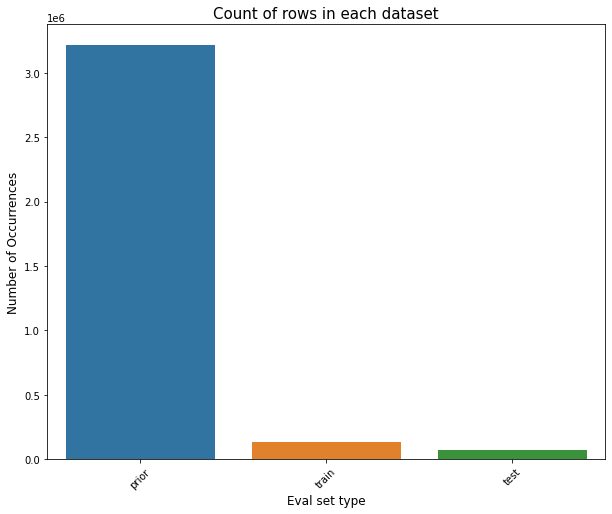

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(orders['eval_set'])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.DataFrame(orders['eval_set'].value_counts())

,eval_set
prior,3214874
train,131209
test,75000


First all orders are classsified as prior orders and last order. the last order is further divided into training set and test set. So prior order provides the history of a users ordering habit. The model for prediction will need evaluation based on training set. And the final prediction model will be evaluated for accuracy on the test set.



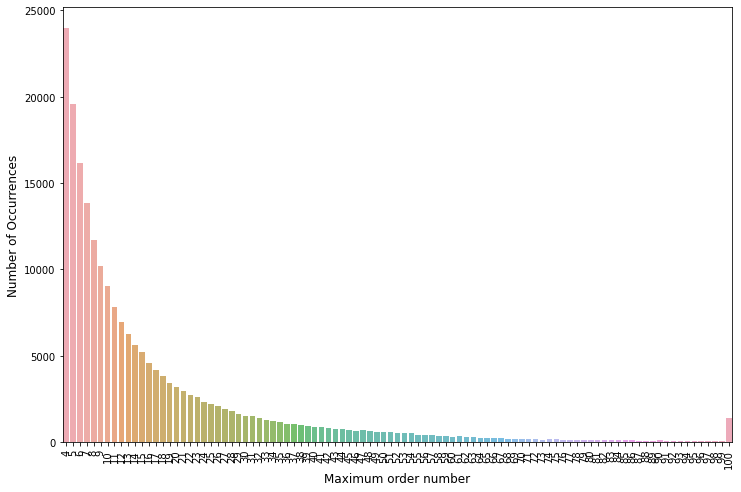

In [ ]:
count = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count = count.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
count.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

In [ ]:
count.tail()

94    57
91    56
97    54
98    50
99    47
Name: order_number, dtype: int64

ach observation in orders_df data frame has order_number field. The order_number represents the order in which a user ordered products. The maximum of the order number per customer represents the customers ordering habits - how mny products are ordered at the most by a user. We see 23,986 orders had a max of 4 products on one end and about 47 orders had 99 items in them

## Frequency of order by week day

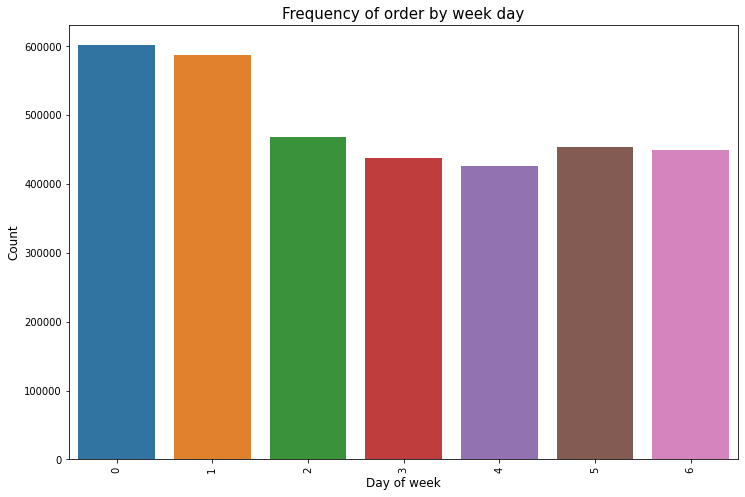

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Assume 0 and 1 are weekend Orders arrive the most on Saturday and Sunday


## Frequency of order by hour of day

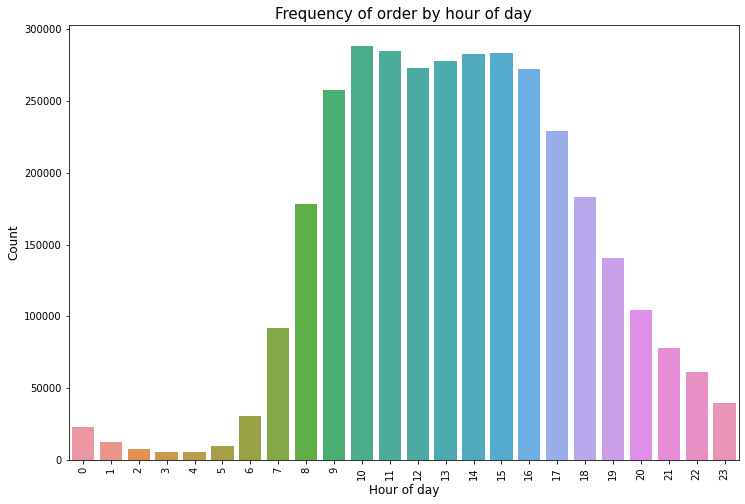

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

## Frequency distribution by days since prior order

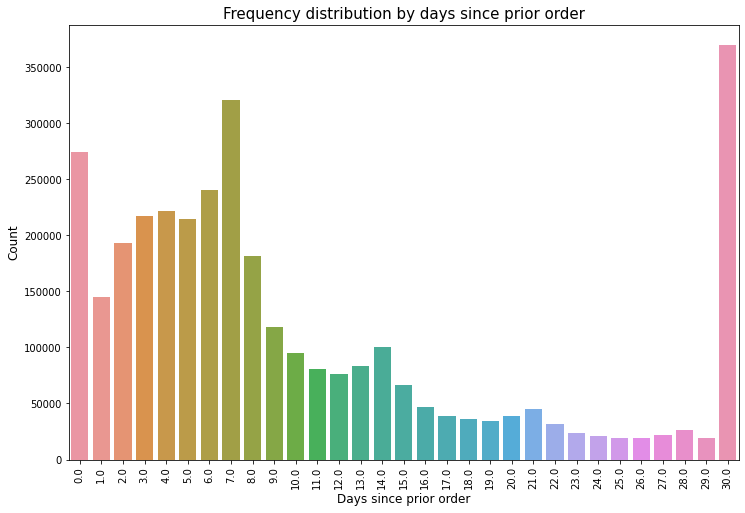

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

# Data preprocessing and combineing

In [ ]:
prior = pd.merge(prior, products, on='product_id', how='left')
prior = pd.merge(prior, aisles, on='aisle_id', how='left')
prior = pd.merge(prior, departments, on='department_id', how='left')
prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
train = pd.merge(train, products, on='product_id', how='left')
train = pd.merge(train, aisles, on='aisle_id', how='left')
train = pd.merge(train, departments, on='department_id', how='left')
train.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,specialty cheeses,dairy eggs
1,9,36,19660,2,1,Spring Water,115,7,water seltzer sparkling water,beverages
2,10,36,49235,3,0,Organic Half & Half,53,16,cream,dairy eggs
3,11,36,43086,4,1,Super Greens Salad,123,4,packaged vegetables fruits,produce
4,12,36,46620,5,1,Cage Free Extra Large Grade AA Eggs,86,16,eggs,dairy eggs


In [ ]:
test = pd.merge(test, products, on='product_id', how='left')
test = pd.merge(test, aisles, on='aisle_id', how='left')
test = pd.merge(test, departments, on='department_id', how='left')
test.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


# Data visivalization after merging

In [ ]:
count = prior['product_name'].value_counts().reset_index().head(5)
count.columns = ['product_name', 'frequency_count']
count

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


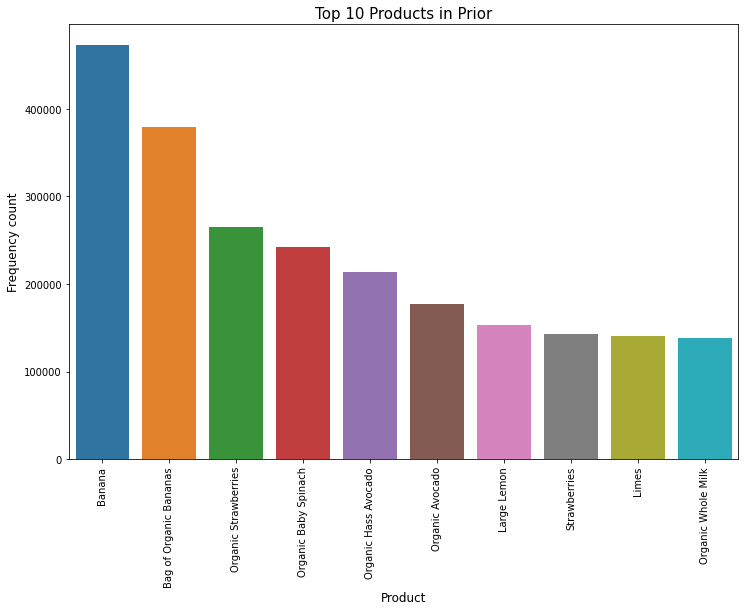

In [ ]:
count = prior['product_name'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Frequency count', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 10 Products in Prior',fontsize=15)
plt.show()

In [ ]:
count = train['product_name'].value_counts().reset_index().head(5)
count.columns = ['product_name', 'frequency_count']
count

,product_name,frequency_count
0,Banana,14509
1,Bag of Organic Bananas,11939
2,Organic Strawberries,8382
3,Organic Baby Spinach,7586
4,Large Lemon,6316


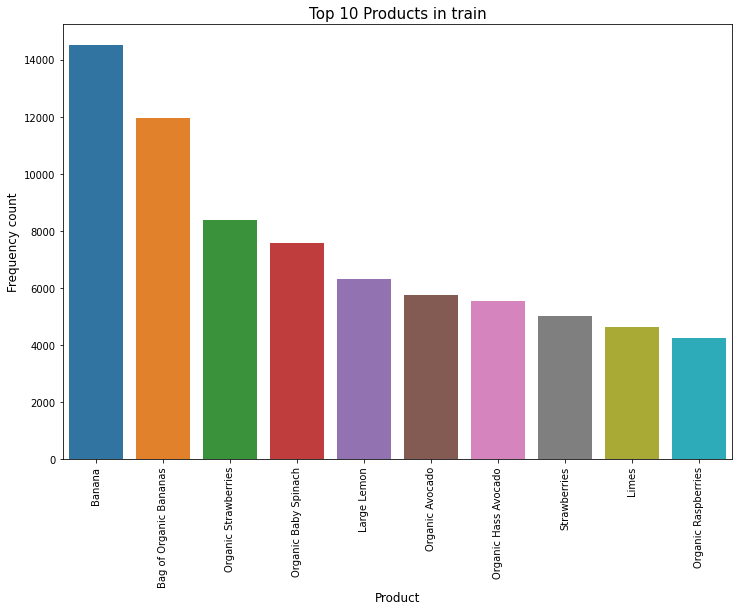

In [ ]:
count = train['product_name'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Frequency count', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 10 Products in train',fontsize=15)
plt.show()

In [ ]:
count = test['product_name'].value_counts().reset_index().head(5)
count.columns = ['product_name', 'frequency_count']
count

,product_name,frequency_count
0,Banana,4217
1,Bag of Organic Bananas,3541
2,Organic Strawberries,2512
3,Organic Baby Spinach,2198
4,Large Lemon,1819


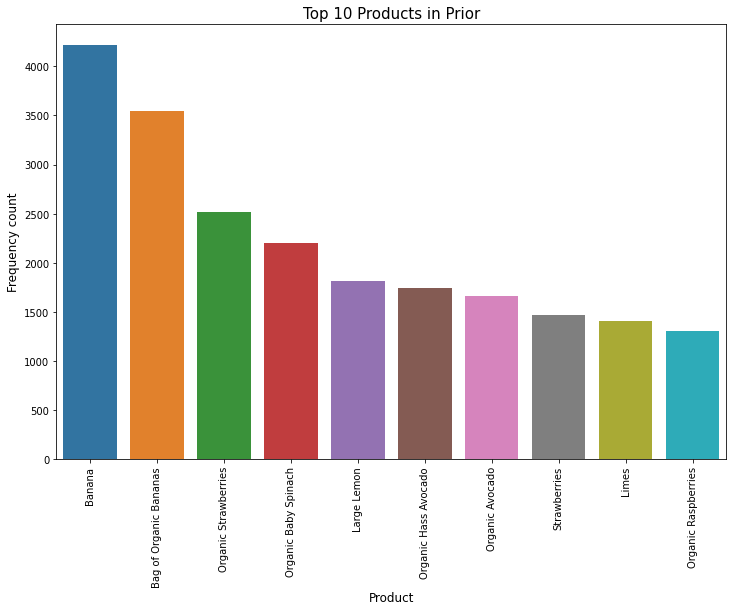

In [ ]:
count = test['product_name'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Frequency count', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 10 Products in Prior',fontsize=15)
plt.show()

In [ ]:
count = prior['aisle'].value_counts().reset_index().head(5)
count.columns = ['aisle', 'frequency_count']
count

,aisle,frequency_count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763


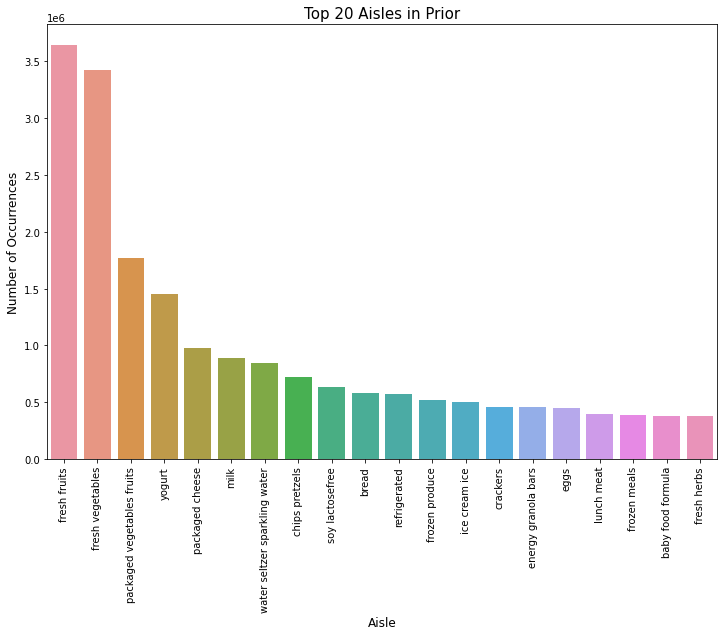

In [ ]:
count = prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Aisles in Prior',fontsize=15)
plt.show()

In [ ]:
count = train['aisle'].value_counts().reset_index().head(5)
count.columns = ['aisle', 'frequency_count']
count

,aisle,frequency_count
0,fresh vegetables,116256
1,fresh fruits,116003
2,packaged vegetables fruits,60499
3,yogurt,42589
4,packaged cheese,32194


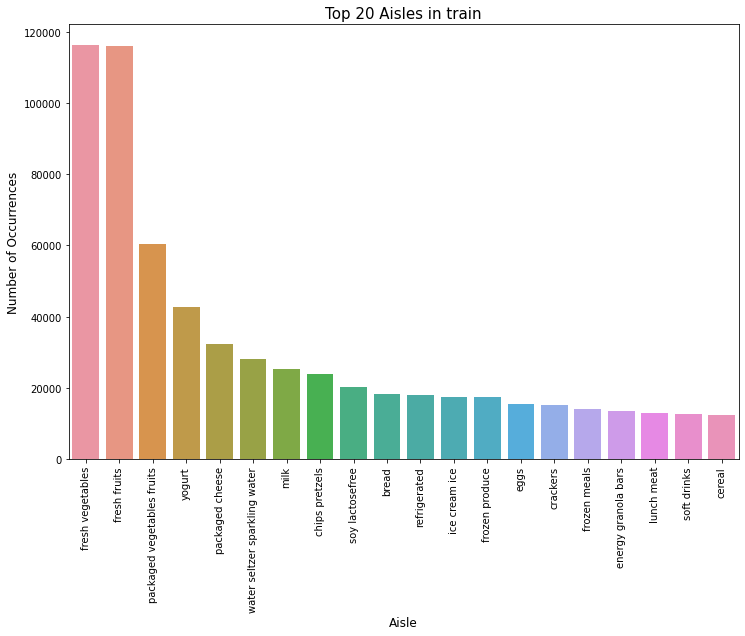

In [ ]:
count = train['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Aisles in train',fontsize=15)
plt.show()

In [ ]:
count = test['aisle'].value_counts().reset_index().head(5)
count.columns = ['aisle', 'frequency_count']
count

,aisle,frequency_count
0,fresh fruits,34470
1,fresh vegetables,34353
2,packaged vegetables fruits,17994
3,yogurt,12651
4,packaged cheese,9505


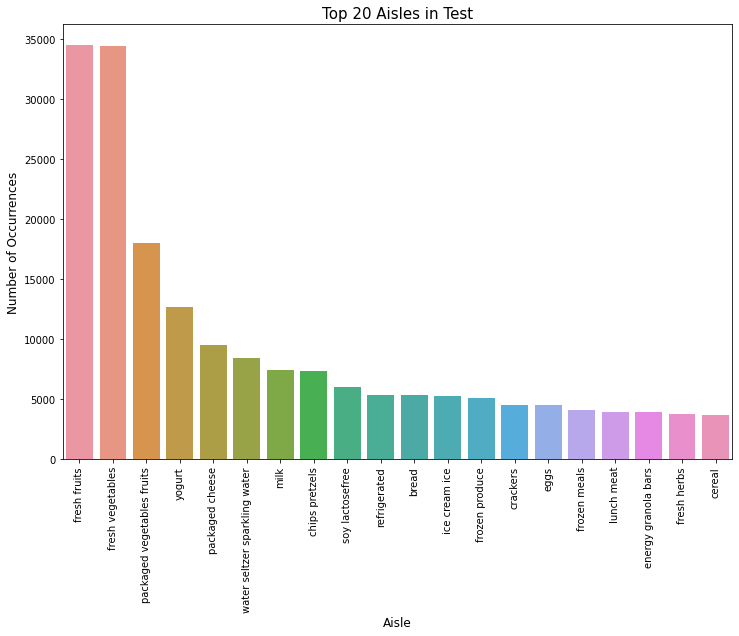

In [ ]:
count = test['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Aisles in Test',fontsize=15)
plt.show()

In [ ]:
count = prior['department'].value_counts().reset_index().head(5)
count.columns = ['department', 'frequency_count']
count

,department,frequency_count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432


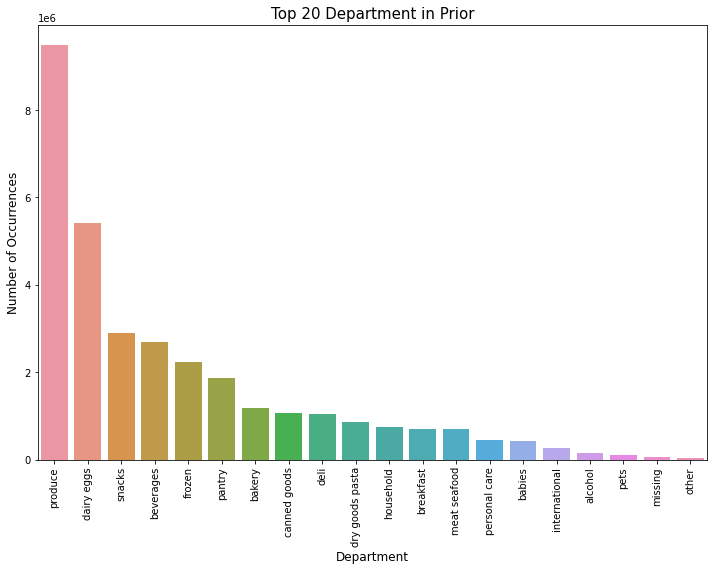

In [ ]:
count = prior['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Department in Prior',fontsize=15)
plt.show()

In [ ]:
count = prior['department'].value_counts().reset_index().head(5)
count.columns = ['department', 'frequency_count']
count

,department,frequency_count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432


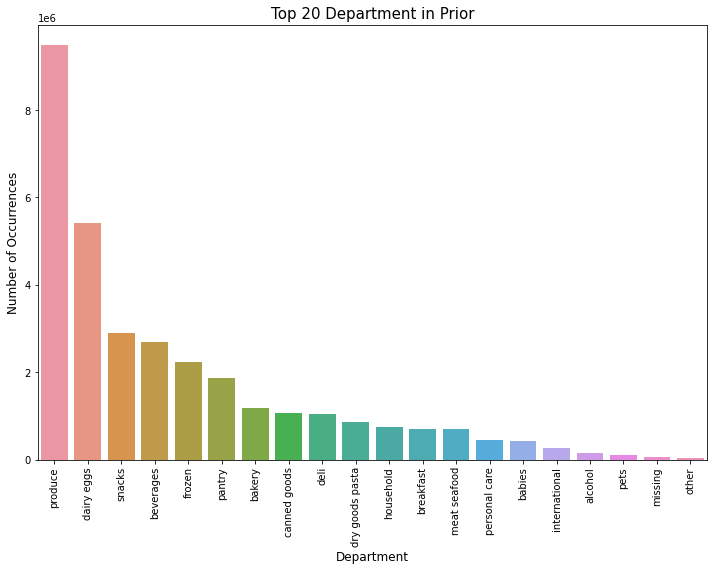

In [ ]:
count = prior['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Department in Prior',fontsize=15)
plt.show()

In [ ]:
count = train['department'].value_counts().reset_index().head(5)
count.columns = ['department', 'frequency_count']
count

,department,frequency_count
0,produce,315282
1,dairy eggs,167527
2,snacks,91413
3,beverages,88061
4,frozen,77593


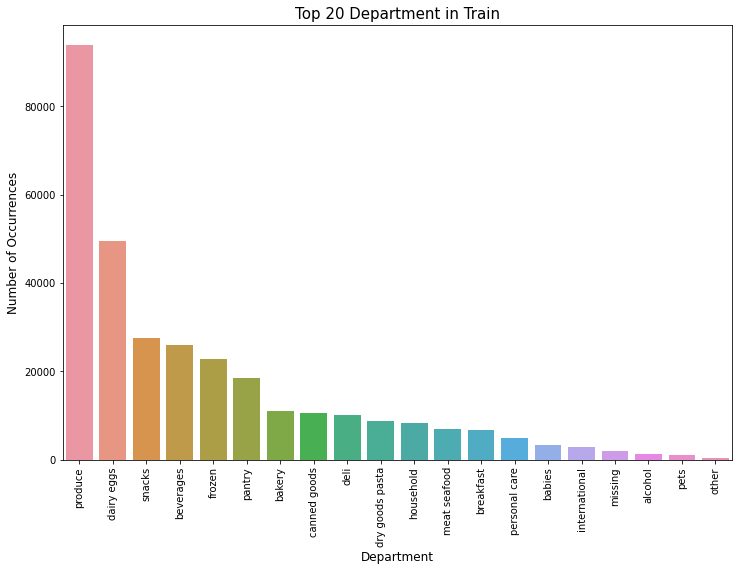

In [ ]:
count = test['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Department in Train',fontsize=15)
plt.show()

In [ ]:
count = test['department'].value_counts().reset_index().head(5)
count.columns = ['department', 'frequency_count']
count

,department,frequency_count
0,produce,93805
1,dairy eggs,49524
2,snacks,27449
3,beverages,25985
4,frozen,22833


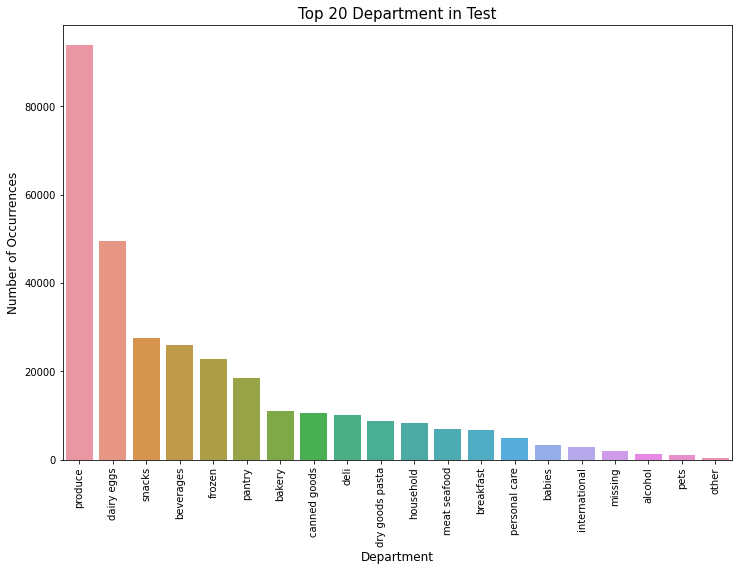

In [ ]:
count = test['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Top 20 Department in Test',fontsize=15)
plt.show()

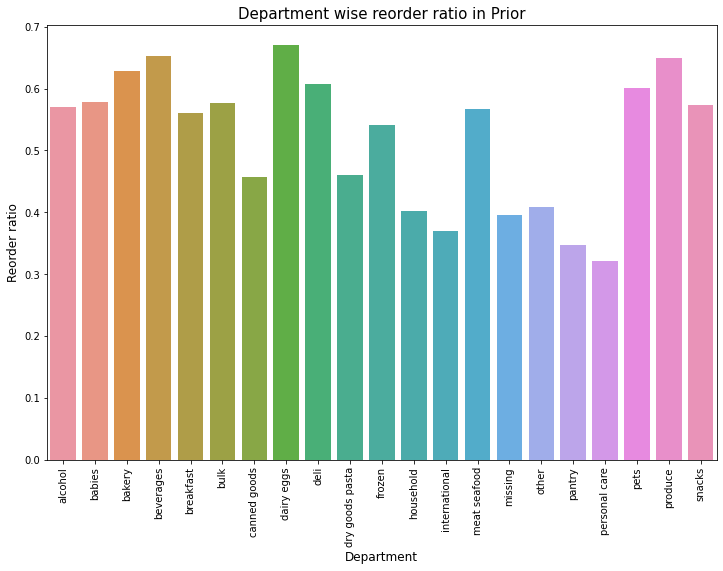

In [ ]:
grouped = prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped['department'].values, grouped['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio in Prior", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

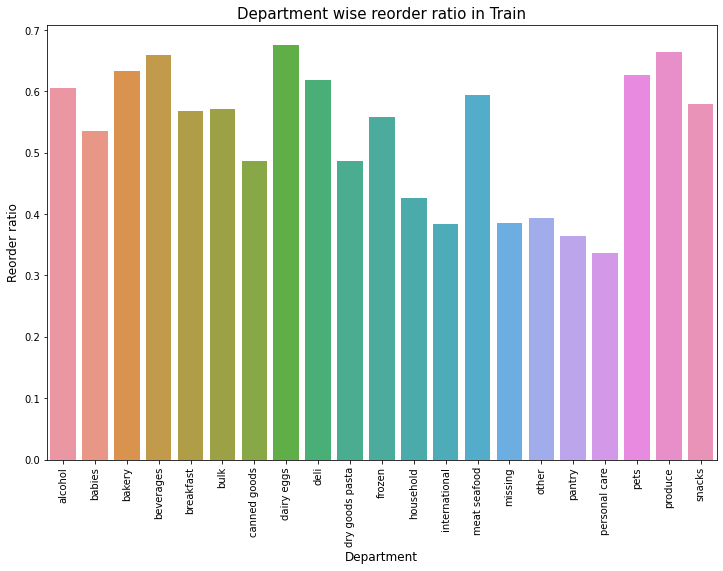

In [ ]:
grouped = train.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped['department'].values, grouped['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio in Train", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

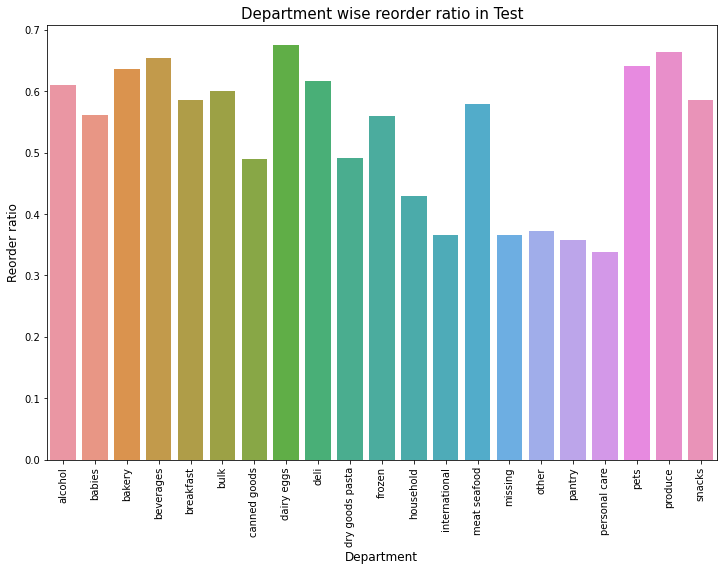

In [ ]:
grouped = test.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped['department'].values, grouped['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio in Test", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Apriori modeling


In [ ]:
trainDf = train.append(prior,ignore_index = True)

In [ ]:
trainDf.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,8.0,36,39612,1,0
1,9.0,36,19660,2,1
2,10.0,36,49235,3,0
3,11.0,36,43086,4,1
4,12.0,36,46620,5,1


In [ ]:
trainDf['reordered'] = 1

In [ ]:
productCountDf = trainDf.groupby("product_id",as_index = False)["order_id"].count()

In [ ]:
productCountDf

,product_id,order_id
0,1,1912
1,2,94
2,3,281
3,4,343
4,5,15
...,...,...
49678,49684,9
49679,49685,49
49680,49686,126
49681,49687,13


In [ ]:
newproductCountDf=productCountDf.merge(products, left_on='product_id', right_on='product_id', how='inner')

In [ ]:
newproductCountDf

,product_id,order_id,product_name,aisle_id,department_id
0,1,1912,Chocolate Sandwich Cookies,61,19
1,2,94,All-Seasons Salt,104,13
2,3,281,Robust Golden Unsweetened Oolong Tea,94,7
3,4,343,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,15,Green Chile Anytime Sauce,5,13
...,...,...,...,...,...
49678,49684,9,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49679,49685,49,En Croute Roast Hazelnut Cranberry,42,1
49680,49686,126,Artisan Baguette,112,3
49681,49687,13,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
newDf = newproductCountDf[['product_id','product_name']]
newDf

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49678,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49679,49685,En Croute Roast Hazelnut Cranberry
49680,49686,Artisan Baguette
49681,49687,Smartblend Healthy Metabolism Dry Cat Food


In [ ]:
#Top 1000 most frequently purchased products
topLev = 1000
productCountDf = productCountDf.sort_values("order_id",ascending = False)


In [ ]:
topProdFrame = productCountDf.iloc[0:topLev,:]
productId= topProdFrame.loc[:,["product_id"]]

In [ ]:
productId

,product_id
24848,24852
13172,13176
21133,21137
21899,21903
47204,47209
...,...
9594,9598
18019,18023
18666,18670
3338,3339


In [ ]:
df = trainDf[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = trainDf[trainDf.product_id == pId ]
    df = df.append(stDf,ignore_index = False)

In [ ]:
df.shape

(7690242, 5)

In [ ]:
df.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
90,115.0,226,24852,2,1
160,196.0,878,24852,2,1
224,297.0,1139,24852,1,1
250,323.0,1145,24852,1,1
317,401.0,1468,24852,1,1


In [ ]:
df=df.merge(newDf, left_on='product_id', right_on='product_id', how='inner')
df=df[['order_id','add_to_cart_order','reordered','product_name']]
df

,order_id,add_to_cart_order,reordered,product_name
0,226,2,1,Banana
1,878,2,1,Banana
2,1139,1,1,Banana
3,1145,1,1,Banana
4,1468,1,1,Banana
...,...,...,...,...
7690237,3420522,1,1,Organic Broccoli Florets
7690238,3420704,5,1,Organic Broccoli Florets
7690239,3420826,4,1,Organic Broccoli Florets
7690240,3420932,15,1,Organic Broccoli Florets


In [ ]:
basket = df.groupby(['order_id', 'product_name'])['reordered'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,Carrots,"Clementines, Bag",Cucumber Kirby,Extra Virgin Olive Oil,Fresh Cauliflower,Garlic,Granny Smith Apples,Grape White/Green Seedless,Grated Parmesan,Green Bell Pepper,Half & Half,Hass Avocados,Honeycrisp Apple,Jalapeno Peppers,Large Alfresco Eggs,Large Lemon,Lime Sparkling Water,Limes,Michigan Organic Kale,Orange Bell Pepper,Organic Avocado,Organic Baby Arugula,Organic Baby Carrots,Organic Baby Spinach,Organic Bartlett Pear,Organic Black Beans,Organic Blackberries,Organic Blueberries,...,Organic Large Extra Fancy Fuji Apple,Organic Lemon,Organic Navel Orange,Organic Peeled Whole Baby Carrots,Organic Raspberries,Organic Red Bell Pepper,Organic Red Onion,Organic Reduced Fat 2% Milk,Organic Reduced Fat Milk,Organic Romaine Lettuce,Organic Small Bunch Celery,Organic Sticks Low Moisture Part Skim Mozzarella String Cheese,Organic Strawberries,Organic Tomato Cluster,Organic Unsweetened Almond Milk,Organic Whole Milk,Organic Whole String Cheese,Organic Yellow Onion,Organic Zucchini,Original Hummus,Pure Irish Butter,Raspberries,Red Onion,Red Peppers,Red Vine Tomato,Roma Tomato,Seedless Red Grapes,Shredded Parmesan,Small Hass Avocado,Soda,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
basket.shape

(2419658, 99)

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 1%

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.016096,(100% Raw Coconut Water)
1,0.025874,(100% Whole Wheat Bread)
2,0.015812,(2% Reduced Fat Milk)
3,0.035853,(Apple Honeycrisp Organic)
4,0.029056,(Asparagus)
...,...,...
124,0.010223,"(Organic Strawberries, Organic Blueberries)"
125,0.010969,"(Organic Hass Avocado, Organic Raspberries)"
126,0.017342,"(Organic Hass Avocado, Organic Strawberries)"
127,0.014526,"(Organic Strawberries, Organic Raspberries)"


In [ ]:
# Create the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules=rules[['antecedents','consequents','antecedent support','consequent support','support','confidence','lift']]

We can also see several where the confidence is high as well.or instance, we can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product combinations. We can filter the dataframe using standard pandas code. In this case, look for a large lift (2) and high confidence (.1):

In [ ]:
rules=rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.1) ]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
36,(Large Lemon),(Limes),0.065701,0.060032,0.011829,0.180037,2.998992
37,(Limes),(Large Lemon),0.060032,0.065701,0.011829,0.197036,2.998992
38,(Organic Avocado),(Large Lemon),0.075448,0.065701,0.010521,0.139451,2.122519
39,(Large Lemon),(Organic Avocado),0.065701,0.075448,0.010521,0.160140,2.122519
49,(Organic Blueberries),(Organic Strawberries),0.042925,0.112853,0.010223,0.238170,2.110445
50,(Organic Hass Avocado),(Organic Raspberries),0.090564,0.058394,0.010969,0.121118,2.074153
51,(Organic Raspberries),(Organic Hass Avocado),0.058394,0.090564,0.010969,0.187844,2.074153
54,(Organic Strawberries),(Organic Raspberries),0.112853,0.058394,0.014526,0.128717,2.204286
55,(Organic Raspberries),(Organic Strawberries),0.058394,0.112853,0.014526,0.248760,2.204286


# Modeling to find reorder


In [ ]:
aisles=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/aisles.csv')
departments=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/departments.csv')
products=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/products.csv')

In [ ]:
orders=pd.read_csv('/content/orders.csv',usecols=["order_id","user_id","order_number"])
prior=pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_prior.csv')

In [ ]:
print("Orders ",orders.shape)
print("Prior ",prior.shape)

Orders  (3421083, 3)
Prior  (32434489, 4)


**Merge Prior with others**

In [ ]:
prior = pd.merge(prior, orders, how="inner", on="order_id")
prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number
0,2,33120,1,1,202279,3
1,2,28985,2,1,202279,3
2,2,9327,3,0,202279,3
3,2,45918,4,1,202279,3
4,2,30035,5,0,202279,3


In [ ]:
prior.shape

(32434489, 6)

In [ ]:
prior_1 = prior.groupby("user_id")["order_number"].aggregate("max").reset_index()
prior_1.head()

,user_id,order_number
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [ ]:
prior_1.shape

(206209, 2)

**Finding whether the Products in the Latest order by each user is Re-Ordered or Not**

In [ ]:
prior_new = pd.merge(prior, prior_1, how="inner", on=["user_id", "order_number"])
prior_new = prior_new[["user_id", "product_id", "reordered"]]
prior_new.columns = ["user_id", "product_id", "reordered_latest"]
prior_new.head()

,user_id,product_id,reordered_latest
0,59897,9755,1
1,59897,31487,0
2,59897,37510,1
3,59897,14576,1
4,59897,22105,0


In [ ]:
prior_new.shape

(2139788, 3)

**Finding Total number of Re-Orders for the Products in the Latest Order**

In [ ]:
prior_new_1= prior.groupby(["user_id","product_id"])["reordered"].aggregate(["count", "sum"]).reset_index()

In [ ]:
prior_new_1.columns = ["user_id", "product_id", "reordered_count", "reordered_sum"]
prior_new_1.head()

,user_id,product_id,reordered_count,reordered_sum
0,1,196,10,9
1,1,10258,9,8
2,1,10326,1,0
3,1,12427,10,9
4,1,13032,3,2


**By Combing above DataFrames, we get Products Ordered in Latest Order along with Re-Oreder Count as well as Latest Re-Ordered status**

In [ ]:
prior_final = pd.merge(prior_new_1, prior_new, how="left", on=["user_id","product_id"])
prior_final.head()

,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,196,10,9,1.0
1,1,10258,9,8,1.0
2,1,10326,1,0,NaN
3,1,12427,10,9,1.0
4,1,13032,3,2,1.0


In [ ]:
prior_final.shape

(13307953, 5)

**Importing Train Dataset , but importing only Order ID**


In [ ]:
orders.drop(["order_number"],axis=1,inplace=True)

train = pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_train.csv', usecols=["order_id"])
train.head()

,order_id
0,36
1,36
2,36
3,36
4,36


**Get the Count of each Order IDs**

In [ ]:
train = train.groupby("order_id").aggregate("count").reset_index()
train.head()

,order_id
0,36
1,38
2,96
3,98
4,112


**Merge wit Orders to get User IDs**

In [ ]:
train = pd.merge(train, orders, how="inner", on="order_id")
train.head()

,order_id,user_id
0,36,79431
1,38,42756
2,96,17227
3,98,56463
4,112,125030


**Importing Test Dataset, but importing only Order ID**

In [ ]:
test = pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_test.csv',usecols=["order_id"])
test.head()

,order_id
0,1
1,1
2,1
3,1
4,1


**Get the Count of each Order IDs**

In [ ]:
test = test.groupby("order_id").aggregate("count").reset_index()
test.head()

,order_id
0,1
1,170
2,473
3,774
4,988


**Merge with Orders to get User IDs**

In [ ]:
test = pd.merge(test, orders, how="inner", on="order_id")
test.head()

,order_id,user_id
0,1,112108
1,170,182389
2,473,77529
3,774,27650
4,988,310


In [ ]:
print(train.shape, test.shape)


(101209, 2) (30000, 2)


**Merge Train with Prior to get Products in the Latest Order by User along with Total Re-Ordered count as well as Latest Re-Ordered Status**

In [ ]:
train = pd.merge(train, prior_final, how="inner", on="user_id")
train.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,36,79431,581,3,2,1.0
1,36,79431,857,1,0,NaN
2,36,79431,2763,2,1,NaN
3,36,79431,3464,1,0,NaN
4,36,79431,3843,1,0,0.0


**Merge Test with Prior to get Products in the Latest Order by User along with Total Re-Ordered count as well as Latest Re-Ordered Status**

In [ ]:
test = pd.merge(test, prior_final, how="inner", on="user_id")
test.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,112108,2067,1,0,NaN
1,1,112108,5707,2,1,1.0
2,1,112108,11109,2,1,NaN
3,1,112108,14947,3,2,1.0
4,1,112108,22035,2,1,NaN


In [ ]:
print(train.shape, test.shape)

(6536661, 6) (1938000, 6)


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**Merge Train with Product to get the aisle and department ID**

In [ ]:
train = pd.merge(train, products, how="inner", on="product_id")
train.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,product_name,aisle_id,department_id
0,36,79431,581,3,2,1.0,Garnet Sweet Potato (Yam),83,4
1,2011,124061,581,1,0,NaN,Garnet Sweet Potato (Yam),83,4
2,3243,206024,581,1,0,NaN,Garnet Sweet Potato (Yam),83,4
3,4827,59631,581,2,1,1.0,Garnet Sweet Potato (Yam),83,4
4,5660,104533,581,3,2,NaN,Garnet Sweet Potato (Yam),83,4


**Merge Test with Product to get the aisle and department ID**

In [ ]:
test = pd.merge(test, products, how="inner", on="product_id")
test.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,product_name,aisle_id,department_id
0,1,112108,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19
1,24849,152144,2067,2,1,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19
2,49360,168224,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19
3,72425,110202,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19
4,104978,98736,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19


**Import newly the Train and merge with orders and Previous train Dataset to get all the values along with re-order status**

In [ ]:
train_y_df = pd.read_csv('/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_train.csv', usecols=["order_id", "product_id", "reordered"])
train_y_df = pd.merge(train_y_df, orders, how="inner", on="order_id")
train_y_df = train_y_df[["user_id", "product_id", "reordered"]]
train_df = pd.merge(train, train_y_df, how="left", on=["user_id", "product_id"])
train_df["reordered"].fillna(0, inplace=True)

In [ ]:
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,product_name,aisle_id,department_id,reordered
0,36,79431,581,3,2,1.0,Garnet Sweet Potato (Yam),83,4,0.0
1,2011,124061,581,1,0,NaN,Garnet Sweet Potato (Yam),83,4,0.0
2,3243,206024,581,1,0,NaN,Garnet Sweet Potato (Yam),83,4,0.0
3,4827,59631,581,2,1,1.0,Garnet Sweet Potato (Yam),83,4,0.0
4,5660,104533,581,3,2,NaN,Garnet Sweet Potato (Yam),83,4,0.0


In [ ]:
train_df['reordered_latest']=train_df['reordered_latest'].fillna(0)

**Import newly the Test and merge with orders and Previous train Dataset to get all the values along with re-order status**

In [ ]:
test_y_df = pd.read_csv("/content/Market Basket Analysis Retail Data using Python/Project and Data Sets/Data/order_products_test.csv", usecols=["order_id", "product_id", "reordered"])
test_y_df = pd.merge(test_y_df, orders, how="inner", on="order_id")
test_y_df = test_y_df[["user_id", "product_id", "reordered"]]
test_df = pd.merge(test, test_y_df, how="left", on=["user_id", "product_id"])
test_df["reordered"].fillna(0, inplace=True)

In [ ]:
test_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,product_name,aisle_id,department_id,reordered
0,1,112108,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19,0.0
1,24849,152144,2067,2,1,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19,0.0
2,49360,168224,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19,0.0
3,72425,110202,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19,0.0
4,104978,98736,2067,1,0,NaN,Plus Cranberry Almond + Antioxidants with Maca...,3,19,0.0


In [ ]:
test_df['reordered_latest']=test_df['reordered_latest'].fillna(0)

**Creation of X and Y**

In [ ]:
X=train_df.drop(["product_name",'reordered'],axis=1)
Y =train_df['reordered']

**Creation of X-train, y-train, X-test, y-test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

**Logistic Regression Model Building and Predictions**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
clf=(LogisticRegression(C=0.02))
clf.fit(X_train, y_train)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=clf.predict(X_test)

In [ ]:
print(accuracy_score(pred, y_test))

0.9018771654776809


In [ ]:
test_final_x=test_df.drop(["product_name",'reordered'],axis=1)
test_final_y=test_df['reordered']

In [ ]:
test_final_pred=clf.predict(test_final_x)

In [ ]:
accuracy = accuracy_score(test_final_y, test_final_pred)
accuracy

0.9022714138286894

**Random Forest Classifier model Building and Predictions**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, oob_score=True)
clfrf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predrf=clfrf.predict(X_test)

In [ ]:
accuracy_score(predrf, y_test)

0.904483387856558

In [ ]:
test_final_x=test_df.drop(["product_name",'reordered'],axis=1)
test_final_y=test_df['reordered']

In [ ]:
test_final_pred=clf.predict(test_final_x)

In [ ]:
accuracy = accuracy_score(test_final_y, test_final_pred)
accuracy

0.9022714138286894

**XGBoost Model Building and Predictions**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

[07:27:11] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_pred = model.predict(X_test)
predictions = [round(value) for value in y_train_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9042655397309698

In [ ]:
test_final_x=test_df.drop(["product_name",'reordered'],axis=1)
test_final_y=test_df['reordered']

In [ ]:
test_final_pred=model.predict(test_final_x)

In [ ]:
pred = [round(value) for value in test_final_pred]

In [ ]:
accuracy = accuracy_score(test_final_y, pred)
accuracy

0.9045330237358101